#  Reinforcement Learning Fundamentals Assignment

Here you will use tabular Q-learning to develop a policy for the [Cart Pole](https://gymnasium.farama.org/environments/classic_control/cart_pole/) environment in Gymnasium. In the Cart Pole problem, the aim is to keep a vertical pole balanced on top of a cart. You can apply forces to move the cart right or left, which affects the position and velocity of the cart, as well as the angle and angular velocity of the pole.

To complete the assignment, please do the following:
1. Read the [Cart Pole documentation](https://gymnasium.farama.org/environments/classic_control/cart_pole/) to get an understanding of the states, actions, and rewards associated with this environment.
2. Propose a method for discretizing the state space. This problem has a continuous state space, unlike the Blackjack environment that we worked with previously. This presents a challenge, since tabular Q-learning requires the problem to have a finite state space. We will address this by mapping the each of the problem's continuous states to a state in an approximate finite state space. When selecting your finite state space, you will need to strike the right balance between using an apporoximation that is sufficiently granular to be accurate, but not so granular that the resulting state space is too large to effectively implement tabular Q-learning.
3. Implement tabular Q-learning to compute a policy for the Cart Pole problem. You may reuse code from the Blackjack notebook that we used in class.
4. Simulate your policy in the Cart Pole environment. Can you keep the pole balanced for at least 500 time steps?

---

Before you get started, we will set up and demonstrate the Cart Pole environment.

In [1]:
# First we will install the Gymnasium package
#!pip install gymnasium
#!pip install pygame
#!pip install gymnasium[classic-control]

In [2]:
import gymnasium as gym
import numpy as np
import random

from IPython import display
import matplotlib.pyplot as plt

Here we simulate the environment with the following simple heuristic policy:
- If the pole is leaning to the left, push the cart to the left
- If the pole is leaning to the right, push the cart to the right

As you can see, this policy is actually unstable. The pole will quickly fall and the cart will run off the screen.

**NOTE:** The animations of the environment can look glitchy if you run them directly in Colab. Run the notebook locally to see smoother animations.

In [12]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
obs = env.reset()[0]

for i in range(10):
    # move left always
    action = 0

    obs, reward, done, info, other = env.step(action)
    print(obs, reward, done, info)

env.close()

[-0.00854563 -0.23570298  0.02346064  0.27975014] 1.0 False False
[-0.01325969 -0.4311516   0.02905564  0.5797392 ] 1.0 False False
[-0.02188273 -0.6266684   0.04065043  0.8814318 ] 1.0 False False
[-0.03441609 -0.82231826  0.05827906  1.186612  ] 1.0 False False
[-0.05086246 -1.0181456   0.0820113   1.4969785 ] 1.0 False False
[-0.07122537 -1.214163    0.11195087  1.8141009 ] 1.0 False False
[-0.09550863 -1.4103392   0.14823289  2.139368  ] 1.0 False False
[-0.12371542 -1.6065834   0.19102025  2.4739273 ] 1.0 False False
[-0.15584709 -1.8027277   0.2404988   2.8186111 ] 1.0 True False
[-0.19190164 -1.9985085   0.296871    3.1738572 ] 0.0 True False


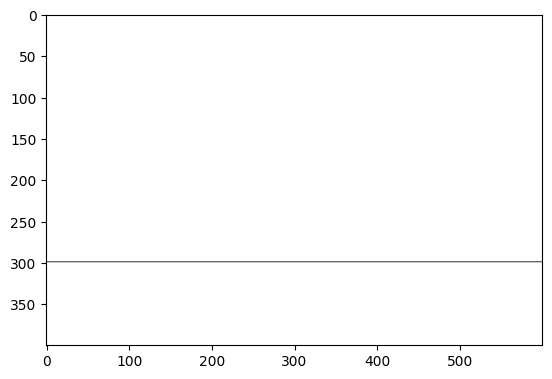

In [3]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

obs = env.reset()[0]
plt.imshow(env.render())
plt.show()

for i in range(250):

    if obs[2] < 0:
        action=0
    else:
        action=1

    obs, reward, done, info, other = env.step(action)

    display.clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()

env.close()

---

Describe the discretization that you used here.

In [59]:
import random
# Implement your Q-learning code here.

def initialize_Q(min_v=-5, max_v=5, inc_v=0.5, min_a=-0.42, max_a=0.42, inc_a=0.2):
    Q = {}
    return Q

Q = initialize_Q()


def greedy_epsilon(obs, env, epsilon=0.1):
    if random.random() <= epsilon:
        return env.action_space.sample()
    
    return 0 if Q[(obs, 0)] > Q[(obs, 1)] else 1

def hash(obs, done):
    if done:
        return "done"
    else:
        return type(obs)
    
def add_if_not_in_dict(obs, Q):
    if (obs, 0) not in Q:
        Q[(obs, 0)] = 0.0
    if (obs, 1) not in Q:
        Q[(obs, 1)] = 0.0

env = gym.make("CartPole-v1", render_mode="rgb_array")

obs = env.reset()[0]
hobs = hash(obs, False)
add_if_not_in_dict(hobs, Q)

alpha = 0.9
discount_factor = 0.1

for i in range(0, 5000000):
    action = greedy_epsilon(hobs, env)
    
    done = False
    while not done:
        hobs_prev = hobs
        obs, reward, done, _, _ = env.step(action)
        hobs = hash(obs, done)
        add_if_not_in_dict(hobs, Q)
        
        maxQ = max(Q[(hobs, 0)], Q[(hobs, 1)])
        Q[(hobs_prev, action)] = (1-alpha)*Q[(hobs_prev, action)] + alpha * (reward + discount_factor*maxQ)

env.close()

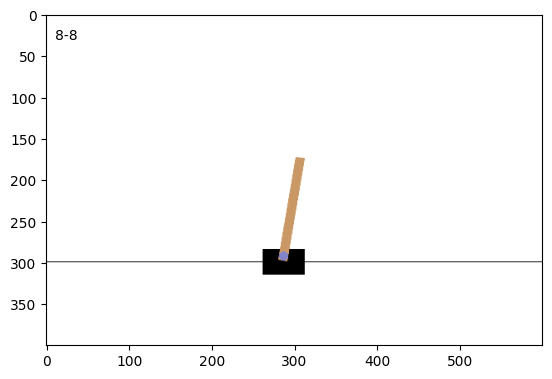

In [60]:
# Implement the simulation of your policy here.
def maxQ_policy(obs):
    return 0 if Q[(obs, 0)] > Q[(obs, 1)] else 1


def dance():
    env = gym.make("CartPole-v1", render_mode="rgb_array")

    obs = env.reset()[0]
    plt.imshow(env.render())
    plt.show()
    
    misses = 0
    action = 0
    done = False

    for i in range(0, 500):
        hobs = hash(obs, done)
        
        if (hobs, 0) in Q:
            action = maxQ_policy(hobs)
        
        if (hobs, 0) not in Q:
            misses += 1

        obs, _, done, _, _ = env.step(action)
        if done:
            break
        
        display.clear_output(wait=True)
        plt.imshow(env.render())
        plt.text(10, 30, str(misses)+'-'+str(i+1))
        plt.show()

    env.close()
    return misses, i+1

misses, iterations = dance()